## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [27]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=2360873)
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=8)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
mse_1 = regr_1.score(x_train, y_train)
mse_2 = regr_2.score(x_train, y_train)

template = "O MSE da árvore com profundidade = {0} é {1:.2f}" 
print(template.format(regr_1.get_depth(),mse_1).replace(".",","))
print(template.format(regr_2.get_depth(),mse_2).replace(".",","))

O MSE da árvore com profundidade = 2 é 0,71
O MSE da árvore com profundidade = 8 é 0,98


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

Text(0, 0.5, 'Impureza Total das Folhas')

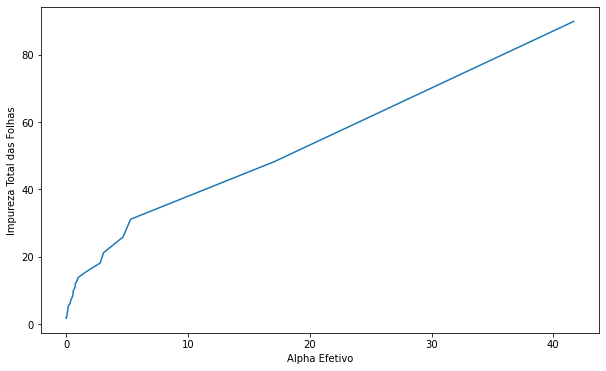

In [33]:
#print(np.shape(x_train))
#print(np.shape(y_train))

path = regr_2.cost_complexity_pruning_path(x_train,y_train)
#path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha Efetivo")
plt.ylabel("Impureza Total das Folhas")


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [34]:
clfs= []
for ccp_alpha in ccp_alphas:
    clf= DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [39]:
train_scores = [mean_squared_error(y_train, clf.predict(x_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(x_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

<function matplotlib.pyplot.show(close=None, block=None)>

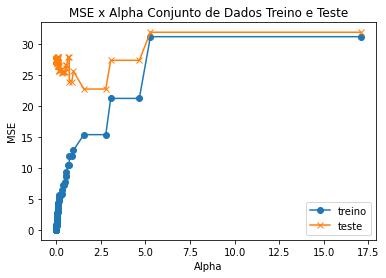

In [41]:
fig, ax= plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x Alpha Conjunto de Dados Treino e Teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker = 'o', label = "treino")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker = 'x', label = "teste")
ax.legend()

plt.show


In [ ]:
Escolhendo valor 2.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [53]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=2)
arvore_final.fit(x_train,y_train)
print(f"Profundidade:{arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de teste:{arvore_final.score(x_test,y_test):.2f}")
print(f"MSE na base de teste:{mean_squared_error(y_test, arvore_final.predict(x_test)):.2f}")

Profundidade:4
R-quadrado na base de teste:0.67
MSE na base de teste:22.70


### 7. Visualize esta árvore.

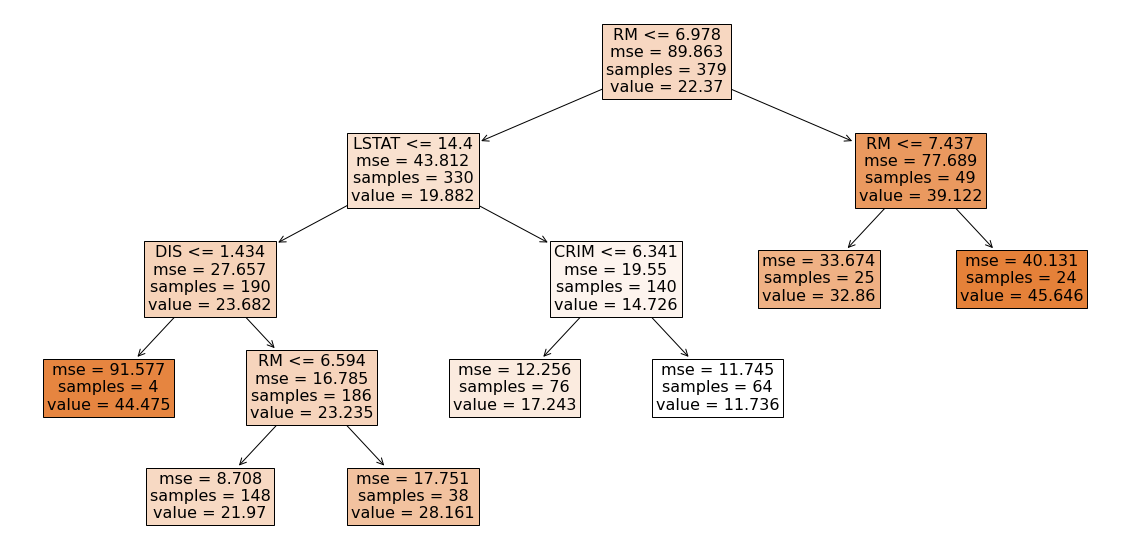

In [56]:
plt.rc('figure',figsize=(20,10))
tp = tree.plot_tree(arvore_final,feature_names=X.columns,filled=True, fontsize=16)